In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Using TensorFlow backend.


In [2]:
# preprocessing
np.set_printoptions(threshold=20000)

# load data
image_data='train_images.npy'
label_data='train_labels.csv'

# images = np.load(image_data, encoding='latin1')
images = np.load(image_data, encoding='latin1')[:,1]
labels = np.loadtxt(label_data, dtype=str, encoding='latin1', delimiter=',')[1:,1]

In [3]:
# a=[]
# for i in range(len(images)):
#     image1 = (images[i][1]).reshape(100,100)
#     #plt.imshow(image1)
#     img = cv2.imwrite('temp.jpg',image1)
#     img = cv2.imread('temp.jpg',0)
#     edges = cv2.Canny(img, 0, 100)
#     #plt.imshow(edges)

#     im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
#     cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:1]


#     mask=np.zeros(img.shape, np.uint8)
#     cv2.drawContours(mask, cnts, -1, (255),1)
#     a.append(mask)
#     #plt.imshow(mask)

In [4]:
# reshape X to "2d" form
# print(images[0])
print(images.shape)
X = np.reshape(images.tolist(), (-1,100,100,1))
X = X.astype('float32')/255


# one-hot encoding for y
encoder=LabelEncoder()
encoder.fit(labels)
y_encoded = encoder.transform(labels)
y = keras.utils.to_categorical(y_encoded)

(10000,)


In [5]:
model = Sequential()
model.add(Conv2D(128, 16, input_shape=(100,100,1), padding='same', activation='relu'))
model.add(Conv2D(128, 16, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(128, 7, padding='same', activation='relu'))
# model.add(Conv2D(128, 7, padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, 5, padding='same', activation='relu'))
model.add(Conv2D(128, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(256, 2, padding='same', activation='relu'))
model.add(Conv2D(256, 2, padding='same', activation='relu'))
# model.add(Conv2D(256, 2, padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(31, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 128)     32896     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 128)     4194432   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       409728    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
__________

In [6]:
model.fit(X, y, validation_split=0.2, epochs=150, batch_size=40)


Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 80s 10ms/step - loss: 3.4151 - acc: 0.0510 - val_loss: 3.3972 - val_acc: 0.0575
Epoch 2/150
8000/8000 [==============================] - 69s 9ms/step - loss: 3.3914 - acc: 0.0528 - val_loss: 3.3902 - val_acc: 0.0575
Epoch 3/150
8000/8000 [==============================] - 69s 9ms/step - loss: 3.3866 - acc: 0.0541 - val_loss: 3.3864 - val_acc: 0.0575
Epoch 4/150
8000/8000 [==============================] - 69s 9ms/step - loss: 3.3875 - acc: 0.0543 - val_loss: 3.3830 - val_acc: 0.0575
Epoch 5/150
8000/8000 [==============================] - 69s 9ms/step - loss: 3.3833 - acc: 0.0570 - val_loss: 3.3822 - val_acc: 0.0575
Epoch 6/150
8000/8000 [==============================] - 69s 9ms/step - loss: 3.3827 - acc: 0.0574 - val_loss: 3.3851 - val_acc: 0.0575
Epoch 7/150
8000/8000 [==============================] - 69s 9ms/step - loss: 3.3819 - acc: 0.0551 - val_loss: 3.3842 - val_acc: 0.0575

8000/8000 [==============================] - 68s 8ms/step - loss: 3.3767 - acc: 0.0570 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 61/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3766 - acc: 0.0570 - val_loss: 3.3826 - val_acc: 0.0575
Epoch 62/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3768 - acc: 0.0570 - val_loss: 3.3824 - val_acc: 0.0575
Epoch 63/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3767 - acc: 0.0570 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 64/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3769 - acc: 0.0570 - val_loss: 3.3824 - val_acc: 0.0575
Epoch 65/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3770 - acc: 0.0570 - val_loss: 3.3826 - val_acc: 0.0575
Epoch 66/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3768 - acc: 0.0570 - val_loss: 3.3824 - val_acc: 0.0575
Epoch 67/150
8000/8000 [==============================

Epoch 120/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3764 - acc: 0.0570 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 121/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3764 - acc: 0.0570 - val_loss: 3.3826 - val_acc: 0.0575
Epoch 122/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3764 - acc: 0.0570 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 123/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3764 - acc: 0.0570 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 124/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3763 - acc: 0.0570 - val_loss: 3.3825 - val_acc: 0.0575
Epoch 125/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3764 - acc: 0.0570 - val_loss: 3.3826 - val_acc: 0.0575
Epoch 126/150
8000/8000 [==============================] - 68s 8ms/step - loss: 3.3764 - acc: 0.0570 - val_loss: 3.3826 - val_acc: 0.0575
Epoch 127/150
8000/8000 [=========

In [7]:
scores1 = model.evaluate(X, y, verbose=0)
print("Test Loss: %.2f%%" % (scores1[0]*100))
print("Test Accuracy: %.2f%%" % (scores1[1]*100))

Test Loss: 337.73%
Test Accuracy: 5.71%


TypeError: 'AxesSubplot' object does not support indexing

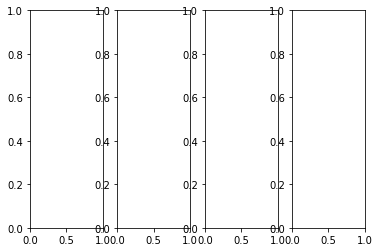

In [8]:
f, axarr = plt.subplots(1, 4)
f.subplots_adjust(hspace=0.5)

for i in range(4):
    axarr[0][i].imshow(np.reshape(X[i],(100,100)), cmap='hot', interpolation='nearest')